In [89]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,confusion_matrix)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (GridSearchCV,StratifiedKFold,cross_val_score)
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv("healthcare_dataset_stroke_data.csv")

In [3]:
df.head().T # first look at data

,0,1,2,3,4
id,9046,51676,31112,60182,1665
gender,Male,Female,Male,Female,Female
age,67.0,61.0,80.0,49.0,79.0
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
ever_married,Yes,Yes,Yes,Yes,Yes
work_type,Private,Self-employed,Private,Private,Self-employed
Residence_type,Urban,Rural,Rural,Urban,Rural
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,NaN,32.5,34.4,24.0


In [4]:
df.tail() # first look at data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
df.info() # to check that is there null object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.describe(exclude=["int64","float"])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [8]:
df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [9]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [10]:
df['bmi'].value_counts()

28.893237    201
28.700000     41
28.400000     38
27.600000     37
26.700000     37
            ... 
11.500000      1
40.600000      1
53.900000      1
97.600000      1
14.900000      1
Name: bmi, Length: 419, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [38]:
df["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [40]:
df.groupby("smoking_status").sum()["stroke"]

smoking_status
Unknown            47
formerly smoked    70
never smoked       90
smokes             42
Name: stroke, dtype: int64

In [41]:
ratio=[90/1892,90/885,42/789,47/1544]

In [42]:
ratio

[0.04756871035940803,
 0.1016949152542373,
 0.053231939163498096,
 0.03044041450777202]

In [52]:
#looks like people who smoke stroke more than the others

In [62]:
df.loc[df["smoking_status"]=="smokes","smoking_status"]=1

In [63]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [64]:
df.loc[df["smoking_status"]!="smokes","smoking_status"]=0

In [65]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,0,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,0,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,0,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,0,1


In [68]:
columns=["work_type","ever_married","Residence_type","avg_glucose_level"]
for i in columns:
    print(df[i].value_counts(),end="\n")

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64


In [70]:
df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)


In [71]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,Yes,Private,1,228.69,36.600000,0,1
1,51676,1,61.0,0,0,Yes,Self-employed,0,202.21,28.893237,0,1
2,31112,0,80.0,0,1,Yes,Private,0,105.92,32.500000,0,1
3,60182,1,49.0,0,0,Yes,Private,1,171.23,34.400000,0,1
4,1665,1,79.0,1,0,Yes,Self-employed,0,174.12,24.000000,0,1


In [74]:
df["smoking_status"]=df["smoking_status"].astype(np.uint8)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   uint8  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   uint8  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   uint8  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(2), uint8(3)
memory usage: 374.4+ KB


In [79]:
df.groupby("ever_married").count()["stroke"]

ever_married
No     1757
Yes    3353
Name: stroke, dtype: int64

In [81]:
df.groupby("ever_married").sum()["stroke"]

ever_married
No      29
Yes    220
Name: stroke, dtype: int64

In [82]:
#look like married people stroke more than the unmarried person
df['ever_married'] = df['ever_married'].replace({'No':0,'Yes':1}).astype(np.uint8)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   uint8  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   uint8  
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   uint8  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   uint8  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(1), uint8(4)
memory usage: 339.5+ KB


In [84]:
df.groupby("work_type").count()["stroke"]

work_type
Govt_job          657
Never_worked       22
Private          2925
Self-employed     819
children          687
Name: stroke, dtype: int64

In [85]:
df.groupby("work_type").sum()["stroke"]

work_type
Govt_job          33
Never_worked       0
Private          149
Self-employed     65
children           2
Name: stroke, dtype: int64

In [116]:
# at the first look you can thinks work type affect the stroking but when we look at the ratio we cannot say that
X=df.drop(["work_type","stroke","id"],axis=1)
y=df[["stroke"]]
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [122]:
x_test

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status
5044,0,33.0,0,0,1,0,81.10,24.8,0
1129,1,33.0,0,0,1,0,86.97,42.2,0
2730,0,27.0,0,0,0,0,110.87,29.5,0
1484,1,3.0,0,0,0,0,114.88,19.1,0
1567,1,44.0,0,0,0,0,65.30,22.1,0
...,...,...,...,...,...,...,...,...,...
4842,0,1.8,0,0,0,1,153.31,17.1,0
4914,1,45.0,0,0,1,1,73.71,34.1,0
3870,0,12.0,0,0,0,0,117.04,18.1,0
2048,1,57.0,0,0,1,0,84.18,35.5,0


# Random Forest

In [124]:

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
train_res = rf.predict(X_train)
test_res = rf.predict(x_test)

C:\Users\Pain\AppData\Local\Temp\ipykernel_2100\4178967528.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [132]:
print("Training accuracy: ",accuracy_score(y_train, train_res))
print("Test accuracy: ",accuracy_score(y_test, test_res))

Training accuracy:  1.0
Test accuracy:  0.9549902152641878


In [126]:
from sklearn.metrics import plot_confusion_matrix, classification_report


C:\Users\Pain\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


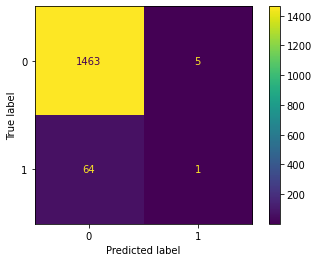

In [129]:
plot_confusion_matrix(rf, x_test, y_test)  
plt.show()

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1468
           1       0.17      0.02      0.03        65

    accuracy                           0.95      1533
   macro avg       0.56      0.51      0.50      1533
weighted avg       0.92      0.95      0.94      1533



# logistic regression

In [134]:
from sklearn import preprocessing

In [136]:
scaler =preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
x_test_scaled= scaler.transform(x_test)

In [137]:
lg_model=LogisticRegression()
lg_model.fit(X_train_scaled, y_train)
train_pred= lg_model.predict(X_train_scaled)
test_predicted = lg_model.predict(x_test_scaled)

C:\Users\Pain\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [141]:
print("Training accuracy: ",accuracy_score(y_train, train_pred))
print("Test accuracy: ",accuracy_score(y_test, test_predicted))

Training accuracy:  0.948280682135868
Test accuracy:  0.9575994781474233


In [143]:
print(classification_report(y_test,test_predicted))



              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1468
           1       0.00      0.00      0.00        65

    accuracy                           0.96      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.92      0.96      0.94      1533



C:\Users\Pain\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pain\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pain\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif